In [48]:
import pandas as pd
import numpy as np

#reading data
attNames = ["a", "b", "c", "d", "e", "f", "g", "h", "i","j","k","l","m","n","o","p"]
FIELD_NAMES = attNames + ["Class"]

trainData = pd.read_csv('pendigits.tra', names=FIELD_NAMES)
testData = pd.read_csv('pendigits.tes', names=FIELD_NAMES)

In [49]:
def parzenClassify(trainData,xtest, h=1):
    kq = 0
#     print(xtest)
    features = xtest.shape[0] - 1
    neighbours = []
    for _, item in trainData.iterrows():
#         print(item)
        x = []
        for i in range(features):
            x.append((xtest[i] - item[i])/h)
        flag = Rectangular_window_function(x)
        if(flag==1):
            neighbours.append(item["Class"])
    j1 = []
    j2 = []
    label = []
    if(len(neighbours) != 0):
        for n1 in range(0,len(neighbours)):
            u = 0
            if n1 not in label:
                label.append(n1)
                for n2 in range(1,len(neighbours)):
                    if neighbours[n1]==neighbours[n2] and n1 != n2:
                        u += 1
                j1.append(neighbours[n1])
                j2.append(u)
        index = j2.index(max(j2))
        kq = max(j2)
        classi = j1[index]
        px = (kq / len(trainData)) / (h**features)
    else:
        classi = -1
        px = 0.0
    return classi,px


In [50]:
def Rectangular_window_function(x):
    for f in x:
        if np.abs(f) > (1/2):
            return 0
    return 1

hi
hi
hi


C:\Users\Fatemeh Saligheh\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in true_divide


hi


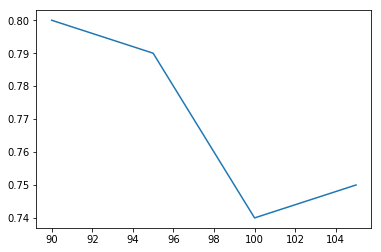

In [56]:
from sklearn.metrics import accuracy_score
def predict(h):
    i= 0
    ypred = []
    for _, row in testData.iterrows():
        i+=1
        c,p = parzenClassify(trainData,row,h)
        ypred.append(c)
        if(i==100):
            break
    ytrue = testData["Class"][:100]
    return accuracy_score(ytrue, ypred)


# importing the required modules 
import matplotlib.pyplot as plt 
import numpy as np 
  
# setting the x - coordinates 
x = np.arange(90, 110, 5) 
# setting the corresponding y - coordinates 
y = []
for j in x:
    print("hi")
    y.append(predict(j))
# potting the points 
plt.plot(x, y) 
  
# function to show the plot 
plt.show() 

In [9]:
#accuracy rate for my implemented classifier
from sklearn.metrics import accuracy_score
ytrue = testData["Class"][:100]
accuracy_score(ytrue, ypred)

0.84

In [10]:
#confusion matrix for my implemented classifier
from sklearn.metrics import confusion_matrix
confusion_matrix(ytrue, ypred)

array([[16,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  4,  5,  0,  0,  0,  1,  1,  0,  0],
       [ 0,  0,  6,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  7,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  8,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  4,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  0,  6,  0,  0,  0],
       [ 0,  2,  1,  0,  0,  0,  0,  4,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0, 16,  0],
       [ 0,  0,  0,  2,  0,  0,  0,  0,  0, 13]], dtype=int64)

In [ ]:
def Rectangular_window_function(x):
    for f in x:
        if np.abs(f) > (1/2):
            return 0
    return 1

In [25]:
from sklearn.neighbors import RadiusNeighborsClassifier
neigh = RadiusNeighborsClassifier(radius=100)
neigh.fit(trainData[attNames], trainData["Class"])

RadiusNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_params=None, n_jobs=None, outlier_label=None, p=2,
             radius=100, weights='uniform')

In [45]:
i= 0
y_pred = []
for _, row in testData.iterrows():
    y_pred.append(neigh.predict([row[attNames]])[0])

In [46]:
#accuracy rate for using sklearn
from sklearn.metrics import accuracy_score
y_true = testData["Class"]
accuracy_score(y_true, y_pred)

0.7790165809033733

In [47]:
#confusion matrix for using sklearn
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, y_pred)

array([[342,   0,   0,   0,   0,   0,  18,   0,   2,   1],
       [  0, 132, 153,  20,   1,  37,  17,   4,   0,   0],
       [  0,   3, 358,   0,   0,   0,   0,   3,   0,   0],
       [  0,   3,   0, 332,   0,   0,   0,   0,   0,   1],
       [  0,   0,   0,   0, 336,   2,  25,   0,   0,   1],
       [  0,   0,   0,  98,   0, 181,  24,   0,   0,  32],
       [  0,   0,   0,   0,   0,   0, 336,   0,   0,   0],
       [  0,  53, 113,  12,   2,   2,   1, 181,   0,   0],
       [  7,   0,   0,   0,   0,  14,   0,   2, 313,   0],
       [  0,   9,   0,  94,  13,   5,   0,   0,   1, 214]], dtype=int64)